# 1 Wstęp

## 1.1 Wybór zadania
### Problem, który wybrałem znany jest pod nazwą '3-partition problem' i należy do grona 'strongly NP-complete problems in Computer Science'
## 1.2 Opis
### Zadaniem programu jest podział danego zbioru liczb naturalnych na n/3 rozłącznych podzbiorów trzyelementowych, gdzie n to ilość liczb na wejściu, w których suma elementów jest taka sama. Problem ten jest znany jako problem trudny obliczeniowo, a człowiek jest w stanie poradzić sobie z tylko niewielką ilością liczb wejściowych, gdy sięgają one kilkudziesięciu liczb jest to praktycznie nie do obliczenia.

# 2 Program obliczający nasz problem

## Import paczek i załadowanie danych wejściowych

In [1]:
import pygad
import numpy
import random
import time
import matplotlib.pyplot as plt

inputs = [
    [1, 2, 3, 3, 5, 6],
    [2, 3, 6, 7, 1, 9],
    [11, 2, 13, 4, 11, 7],
    [3, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    [2, 67, 34, 10, 86, 6, 42, 22, 55, 19, 71, 30],
    [18, 25, 70, 41, 9, 53, 89, 9, 36, 74, 17, 87],
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
    [98, 97, 92, 90, 87, 83, 79, 73, 67, 61, 52, 47, 39, 33, 26, 21, 15, 12, 9, 5, 3],
    [23, 64, 6, 18, 83, 52, 5, 30, 89, 14, 50, 1, 27, 72, 11, 95, 2, 17, 33, 77, 7]
]
my_input = inputs[random.randint(0, 8)] 
# losujemy jedną z interesujących nas tablic, na której będziemy uruchamiać algorytmy

## 2.1 Pierwszy algorytm genetyczny
### Parametry algorytmu
#### - W tym algorytmie ustawiam 'gene space' na indeksy wszystkich elementów w wejściowym zbiorze liczb.
#### - Dodatkowo jako element konstruktora będę podawał parametr 'allow_duplicate_genes=False', co oznacza, że każdy z chromosomów będzie składał się z liczb od 0 do 20 i jedynie ich kolejność będzie się zmieniała. 
#### - Odczytując liczbę z chromosomu i biorąc element na tym indeksie z wejścia wypełniam wyjściowe podzbiory elementami, aby każdy posiadał wielkość 3.
#### - W tak otrzymanych podzbiorach sumuje elementy i zwracam fitness.

In [2]:
gene_space = list(range(int(len(my_input)))) # w przypadku np 6 elementów będzie to tablica [0, 1, 2 ... 5]

def fitness_func(solution, solution_idx):
    solution_spread = [[] for i in range(int(len(gene_space)/3))]
    arr_index = 0
    
    for el in solution:
        if len(solution_spread[arr_index]) < 3:
            solution_spread[arr_index].append(my_input[int(el)])
        else:
            arr_index += 1
            solution_spread[arr_index].append(my_input[int(el)])
            
    results_sums = []
    for tab in solution_spread:
        results_sums.append(numpy.sum(tab))
        
    max_diff = max(results_sums) - min(results_sums)
    return -max_diff

fitness_function = fitness_func 
# funkcja po obliczeniu sum otrzymanych podzbiorów zwraca jako fitness ich najwększą różnicę

sol_per_pop = 500 
# 500 chromosów w populacji wystarcza do otrzymania dobrych rozwiązań, a algorytm działa dość szybko
num_genes = len(my_input)
num_parents_mating = 250
num_generations = 30
keep_parents = 2
parent_selection_type = "sss"
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = int(100/len(my_input)) + 2

### Uruchomienie algorytmu
#### - W konstruktorze podaje wcześniejsze parametry, dodając warunek stopu przy znalezieniu idealnego rozwiązania. Dodatkowo ustawiam wspomniany wcześniej 'allow_duplicate_genes=False' dla niepowtarzających się genów.
#### - Uruchamiam pomiar czasu, a na końcu wyświetlam otrzymany wynik programu: 'solution' wraz z wskazywanymi przez niego podzbiorami oraz wykres prezentujący kolejne pokolenia wraz z wzrostem oceny 'solution'


Parameters of the best solution : [11. 15.  2.  3.  8. 20. 13. 16.  1. 19.  7.  6. 10. 18.  0. 17.  4.  9.
 14. 12.  5.]
The best solution : [[47, 21, 92], [90, 67, 3], [33, 15, 97], [5, 73, 79], [52, 9, 98], [12, 87, 61], [26, 39, 83]]
Fitness value of the best solution = -15


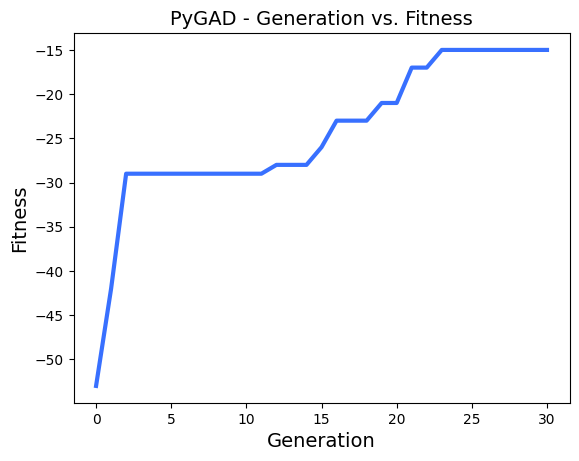

In [3]:
# f = open("projekt/alg1_duze.txt", "a")
start=time.time()

ga_instance = pygad.GA(gene_space=gene_space,
                    num_generations=num_generations,
                    num_parents_mating=num_parents_mating,
                    fitness_func=fitness_function,
                    sol_per_pop=sol_per_pop,
                    num_genes=num_genes,
                    parent_selection_type=parent_selection_type,
                    keep_parents=keep_parents,
                    crossover_type=crossover_type,
                    mutation_type=mutation_type,
                    mutation_percent_genes=mutation_percent_genes,
                    stop_criteria=["reach_0"],
                    allow_duplicate_genes=False)

ga_instance.run()

end=time.time()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
# f.write(str(solution_fitness) + " " + str(end-start)+ "\n")
# f.close()

solution_spread = [[] for i in range(int(len(gene_space)/3))]
arr_index = 0
for el in solution:
        if len(solution_spread[arr_index]) < 3:
            solution_spread[arr_index].append(my_input[int(el)])
        else:
            arr_index += 1
            solution_spread[arr_index].append(my_input[int(el)])
            
print("Parameters of the best solution : {solution}".format(solution=solution))
print("The best solution : {solution_spread}".format(solution_spread=solution_spread))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

ga_instance.plot_fitness()
print()

## 2.2 Drugi algorytm genetyczny
### Parametry algorytmu
#### - Tym razem zmieniłem podejście, ustawiam 'gene space' na kolejne liczby od 0 do ilość podzbiorów wyjściowych. Kolejne elementy solution będą wskazywały, do którego zbioru ma trafić liczba z tego samego indeksu na wejściu.
#### - Problemem w tym podejściu jest możliwość przepełnienia podzbiorów, gdyż każdy powinien mieć wielkość 3. Rozwiązuję go, sprawdzając ich długości, przy czym gdy napotykam na niewłaściwy podzbiór kończę funkcję i zwracam skrajnie niski wynik fitness.
#### - W tak otrzymanych podzbiorach również sumuje elementy i zwracam fitness.

In [4]:
gene_space = list(range(int(len(my_input)/3)))

def fitness_func(solution, solution_idx):
    def check_matrix(matrix):
        lengths = set(len(row) for row in matrix)
        return len(lengths) == 1
    
    solution_spread = [[] for i in range(len(gene_space))]
    for i in range(len(solution)):
        solution_spread[int(solution[i])].append(my_input[i])

    if check_matrix(solution_spread):
        results_sums = []
        for tab in solution_spread:
            results_sums.append(numpy.sum(tab))
        
        max_diff = max(results_sums) - min(results_sums)
        return -max_diff
    else:
        return -1000

fitness_function = fitness_func

sol_per_pop = 500 # ustawiam taką samą populację, aby porównać finalne wyniki
num_genes = len(my_input)
num_parents_mating = 250
num_generations = 30
keep_parents = 2
parent_selection_type = "sss"
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = int(100/len(my_input)) + 2

### Uruchomienie algorytmu
#### - Tak jak wcześniej, podaje parametry konstruktora wraz z warunkiem stopu. Tym razem nie chcę, aby geny były unikalne.
#### - Po raz kolejny zwracam otrzymane wyniki mierząc czas rozwiązania.

Parameters of the best solution : [4. 3. 4. 1. 0. 1. 5. 6. 2. 5. 2. 3. 1. 5. 6. 2. 3. 0. 6. 0. 4.]
The best solution : [[87, 12, 5], [90, 83, 39], [67, 52, 21], [97, 47, 15], [98, 92, 3], [79, 61, 33], [73, 26, 9]]
Fitness value of the best solution = -108


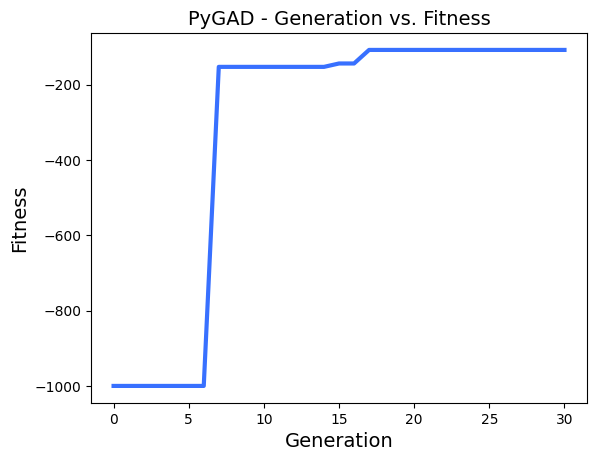

In [5]:
start=time.time()

ga_instance = pygad.GA(gene_space=gene_space,
                    num_generations=num_generations,
                    num_parents_mating=num_parents_mating,
                    fitness_func=fitness_function,
                    sol_per_pop=sol_per_pop,
                    num_genes=num_genes,
                    parent_selection_type=parent_selection_type,
                    keep_parents=keep_parents,
                    crossover_type=crossover_type,
                    mutation_type=mutation_type,
                    mutation_percent_genes=mutation_percent_genes,
                    stop_criteria=["reach_0"],
                    )

ga_instance.run()

end=time.time()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
# f.write(str(solution_fitness) + " " + str(end-start)+ "\n")
# f.close()

solution_spread = [[] for i in range(len(gene_space))]
for i in range(len(solution)):
    solution_spread[int(solution[i])].append(my_input[i])
            
print("Parameters of the best solution : {solution}".format(solution=solution))
print("The best solution : {solution_spread}".format(solution_spread=solution_spread))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

ga_instance.plot_fitness()
print()

# 3 Zestawienie wyników
## Uruchomiłem oba algorytmy, z tymi samymi parametrami dla porównania wyników, 100 razy. Oto wyniki, które orzymałem.

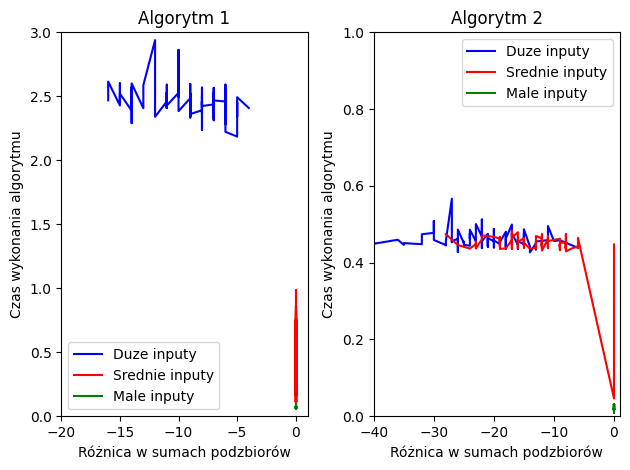

In [6]:
data1 = numpy.loadtxt('alg1_duze.txt')
data2 = numpy.loadtxt('alg1_srednie.txt')
data3 = numpy.loadtxt('alg1_male.txt')
data_1 = numpy.loadtxt('alg2_duze.txt')
data_2 = numpy.loadtxt('alg2_srednie.txt')
data_3 = numpy.loadtxt('alg2_male.txt')
sort_indices1 = numpy.argsort(data1[:, 0])
sort_indices2 = numpy.argsort(data2[:, 0])
sort_indices3 = numpy.argsort(data3[:, 0])
sort_indices_1 = numpy.argsort(data_1[:, 0])
sort_indices_2 = numpy.argsort(data_2[:, 0])
sort_indices_3 = numpy.argsort(data_3[:, 0])
sorted_data1 = data1[sort_indices1]
sorted_data2 = data2[sort_indices2]
sorted_data3 = data3[sort_indices3]
sorted_data_1 = data_1[sort_indices_1]
sorted_data_2 = data_2[sort_indices_2]
sorted_data_3 = data_3[sort_indices_3]

x1 = sorted_data1[:, 0]
x2 = sorted_data2[:, 0]
x3 = sorted_data3[:, 0]
x_1 = sorted_data_1[:, 0]
x_2 = sorted_data_2[:, 0]
x_3 = sorted_data_3[:, 0]
y1 = sorted_data1[:, 1]
y2 = sorted_data2[:, 1]
y3 = sorted_data3[:, 1]
y_1 = sorted_data_1[:, 1]
y_2 = sorted_data_2[:, 1]
y_3 = sorted_data_3[:, 1]

plt.subplot(1, 2, 1)
plt.plot(x1, y1, label= 'Duze inputy', color="blue")
plt.plot(x2, y2, label= 'Srednie inputy', color="red")
plt.plot(x3, y3, label= 'Male inputy', color="green")
plt.xlabel('Różnica w sumach podzbiorów')
plt.ylabel('Czas wykonania algorytmu')
plt.ylim(0, 3)
plt.xlim(-20, 1)
plt.title('Algorytm 1')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_1, y_1, label= 'Duze inputy', color="blue")
plt.plot(x_2, y_2, label= 'Srednie inputy', color="red")
plt.plot(x_3, y_3, label= 'Male inputy', color="green")
plt.xlabel('Różnica w sumach podzbiorów')
plt.ylabel('Czas wykonania algorytmu')
plt.ylim(0, 1)
plt.xlim(-40, 1)
plt.title('Algorytm 2')
plt.legend()
plt.tight_layout()
plt.show()

### - Warto zauważyć różnice na osiach w obu wykresach. 
### - Jak widać, pierwszy algorytm spisuje się o wiele lepiej. Inputy małe i średnie (które są możliwe do rozwiązania!) rozwiązuje bezbłędnie, choć przy tych średniej wielkości czasy rozwiązania sięgają nawet 1 sekundy. Przy dużych natomiast jest blisko znalezienia najmniejszych możliwych różnic.
### - Drugi natomiast popełnia błędy już przy średnich danych wejściowych, czego nie powinien robić. Natomiast różnica sum podzbiorów w dużych niekiedy sięga aż powyżej -40, co również nie powinno mieć miejsca.
### - Jeśli spojrzeć na szybkość algorytmów to bez wątpienia wygrywa jednak algorytm nr 2.

# 4 Podsumowanie oraz bibliografia
## Jak widać w powyższych doświadczeniach, algorytmy, pomimo wspólnego pochodzenia genetycznego, działają kompletnie inaczej poprzez różnice w funkcjach fitness oraz 'gene space'. Pierwszy dokładniejszy, ale wolniejszy. Drugi nie zawsze znajdujący optymalne rozwiązanie, ale zdecydowanie wygrywający na płaszczyźnie prędkości.

## Bibliografia:
### https://en.wikipedia.org/wiki/3-partition_problem
### https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html
### https://numpy.org/doc/
### https://matplotlib.org/stable/index.html